<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Librairies-du-projet" data-toc-modified-id="Librairies-du-projet-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Librairies du projet</a></span></li><li><span><a href="#Lecture-de-l'échantillon-initial" data-toc-modified-id="Lecture-de-l'échantillon-initial-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Lecture de l'échantillon initial</a></span></li><li><span><a href="#Les-valeurs-manquantes" data-toc-modified-id="Les-valeurs-manquantes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Les valeurs manquantes</a></span></li><li><span><a href="#Separation-des-données-pour-l'apprentissage" data-toc-modified-id="Separation-des-données-pour-l'apprentissage-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Separation des données pour l'apprentissage</a></span></li><li><span><a href="#Déclaration-des-classifieurs" data-toc-modified-id="Déclaration-des-classifieurs-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Déclaration des classifieurs</a></span></li><li><span><a href="#Choix-des-classifieurs" data-toc-modified-id="Choix-des-classifieurs-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Choix des classifieurs</a></span><ul class="toc-item"><li><span><a href="#Résultats-d'une-première-exécution" data-toc-modified-id="Résultats-d'une-première-exécution-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Résultats d'une première exécution</a></span></li><li><span><a href="#Etude-de-la-classification-avec-les-arbres-de-décision" data-toc-modified-id="Etude-de-la-classification-avec-les-arbres-de-décision-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Etude de la classification avec les arbres de décision</a></span></li></ul></li><li><span><a href="#Traitement-centrage-et-réduction" data-toc-modified-id="Traitement-centrage-et-réduction-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Traitement centrage et réduction</a></span></li><li><span><a href="#Transformation-des-modalités-des-variables-qualitatives-en-colonnes" data-toc-modified-id="Transformation-des-modalités-des-variables-qualitatives-en-colonnes-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Transformation des modalités des variables qualitatives en colonnes</a></span></li></ul></div>

In [1]:
import pandas as pd  
import seaborn as sns  
import os, warnings
from matplotlib import pyplot as plt

# %pylab inline
%matplotlib inline
if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
    
sns.set(font_scale=2)
warnings.filterwarnings(action="ignore")
seed = 123456789

# Librairies du projet

In [2]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import NuSVC, SVC, OneClassSVM
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, RationalQuadratic, ExpSineSquared, DotProduct, Matern, WhiteKernel

from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.metrics import roc_curve, auc

from sklearn.metrics  import make_scorer, confusion_matrix, roc_curve, auc, accuracy_score, log_loss, hamming_loss, \
                             precision_score, recall_score, f1_score, jaccard_score,  \
                             precision_recall_curve, average_precision_score
from sklearn.preprocessing import LabelEncoder

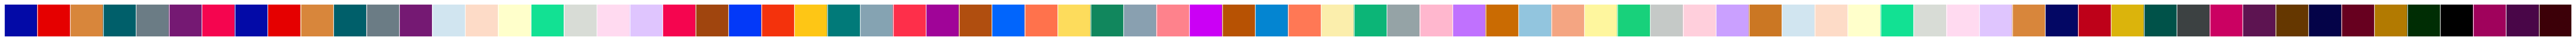

In [3]:
palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973",
            "#f5054f", 
            "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", "#d1e5f0", "#fddbc7",
            "#ffffcb", "#12e193", "#d8dcd6", "#ffdaf0", "#dfc5fe", "#f5054f", "#a0450e",
            "#0339f8", "#f4320c", "#fec615", "#017a79", "#85a3b2", "#fe2f4a", "#a00498", "#b04e0f",
            "#0165fc", "#ff724c", "#fddc5c", "#11875d", "#89a0b0", "#fe828c", "#cb00f5", "#b75203",
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#ffb7ce", "#c071fe", "#ca6b02",
            "#92c5de", "#f4a582", "#fef69e", "#18d17b", "#c5c9c7", "#ffcfdc", "#caa0ff", "#cb7723",
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#ffdaf0", "#dfc5fe", "#d8863b",
            "#030764", "#be0119", "#dbb40c", "#005249", "#3c4142", "#cb0162", "#5d1451", "#653700",
            "#040348", "#67001f", "#b27a01", "#002d04", "#000000", "#a0025c", "#490648", "#3c0008"
          ]
sns.palplot(sns.color_palette(palette))

In [4]:
from datetime import datetime as dt

repertoireRacine  = '.'
nomProjet         = 'Classification de la maladie rénale chronique'

repertoireProjet  = os.path.join(repertoireRacine, nomProjet)
repertoireDonnees = os.path.join(repertoireProjet, 'repertoire.donnees')
repertoireImages  = os.path.join(repertoireProjet, 'repertoire.images')


def controleExistenceRepertoire( repertoire, create_if_needed=True):
    """Voir si le répertoire existe. S'il n'existe pas il est créé."""
    path_exists = os.path.exists(repertoire)
    if path_exists:
        if not os.path.isdir(repertoire):
            raise Exception("Trouvé le nom  "+repertoire +" mais c'est un fichier, pas un répertoire")
            # return False
        return True
    if create_if_needed:
        os.makedirs(repertoire)

def sauvegarderImage( fichier):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    controleExistenceRepertoire(repertoireImages)
    plt.savefig(os.path.join(repertoireImages,
                             fichier+f"--{dt.now().strftime('%Y_%m_%d_%H.%M.%S')}.png"), 
                             dpi=600, 
                             bbox_inches='tight')

def sauvegarderImageSNS( sns_plot, fichier):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    controleExistenceRepertoire(repertoireImages)
    fig = sns_plot.get_figure()
    fig.savefig(os.path.join(repertoireImages,fichier+'.png'))
    
controleExistenceRepertoire(repertoireProjet);
controleExistenceRepertoire(repertoireDonnees);
controleExistenceRepertoire(repertoireImages);

def afficheDistribution(colonne, cible):
        plt.figure(figsize=(14,12))
        sns.distplot(colonne[
                           cible == 1],
                       color="steelblue")
        sns.distplot(colonne[
                           cible == 0],
                       color="red")
        axline((colonne.median(), 0), (colonne.median(), 1), linewidth=1, color='r', linestyle='--')
        sauvegarderImage("La distribution des colonnes")    
        plt.show()
        
def createColumnsQualitatives(donnees,col):
    valeurs = donnees[col].sort_values().unique()
    for i in valeurs : 
        nom = col+'_'+str(i)
        donnees[nom] = donnees[col].apply(lambda x : 1 if x==i else 0)
    donnees.drop(labels=col, axis=1, inplace=True)        

# Lecture de l'échantillon initial


<img src="https://raw.githubusercontent.com/rbizoi/IntelligenceEnDonneesDeSante/main/images/EchantillonInitial.png" width="800">

>> **Vous trouvez les données et leur description :**<br>
>> https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease<br>
>> https://www.kaggle.com/datasets/abhia1999/chronic-kidney-disease<br>


>> **age** - age                    <br>
>> **bp** - blood pressure          <br>
>> **sg** - specific gravity        <br>
>> **al** - albumin                 <br>
>> **su** - sugar                   <br>
>> **rbc** - red blood cells        <br>
>> **pc** - pus cell                <br>
>> **pcc** - pus cell clumps        <br>
>> **ba** - bacteria                <br>
>> **bgr** - blood glucose random   <br>
>> **bu** - blood urea              <br>
>> **sc** - serum creatinine        <br>
>> **sod** - sodium                 <br>
>> **pot** - potassium              <br>
>> **hemo** - hemoglobin            <br>
>> **pcv** - packed cell volume     <br>
>> **wc** - white blood cell count  <br>
>> **rc** - red blood cell count    <br>
>> **htn** - hypertension           <br>
>> **dm** - diabetes mellitus       <br>
>> **cad** - coronary artery disease<br>
>> **appet** - appetite             <br>
>> **pe** - pedal edema             <br>
>> **ane** - anemia                 <br>
>> **class** - class                <br>

In [5]:
donnees = pd.read_csv("donnees/Chronic kidney disease/new_model.csv")
variablesQualitatives = ['Al','Su','Rbc', 'Htn']
donnees[variablesQualitatives] = donnees[variablesQualitatives].astype('int16')
variablesQuantitatives  = donnees.drop(columns=['Class']+variablesQualitatives).columns
cible = 'Class'
donnees.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1,0,1,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1,1
1,50.0,1.020,4,0,1,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0,1
2,80.0,1.010,2,3,1,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0,1
3,70.0,1.005,4,0,1,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1,1
4,80.0,1.010,2,0,1,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0,1


In [6]:
donnees.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.367500,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482728,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


# Les valeurs manquantes

In [7]:
donnees.isna().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

In [8]:
X = donnees.drop(columns='Class')
y = donnees.Class

# Separation des données pour l'apprentissage

<img src="https://raw.githubusercontent.com/rbizoi/IntelligenceEnDonneesDeSante/main/images/EchantillonApprentissageTest.png" width="800">

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                     y, 
                                                     test_size=0.2, 
                                                     random_state=seed, 
                                                     stratify = y
                                                   ) 

In [10]:
X_train.shape, X_test.shape

((320, 13), (80, 13))

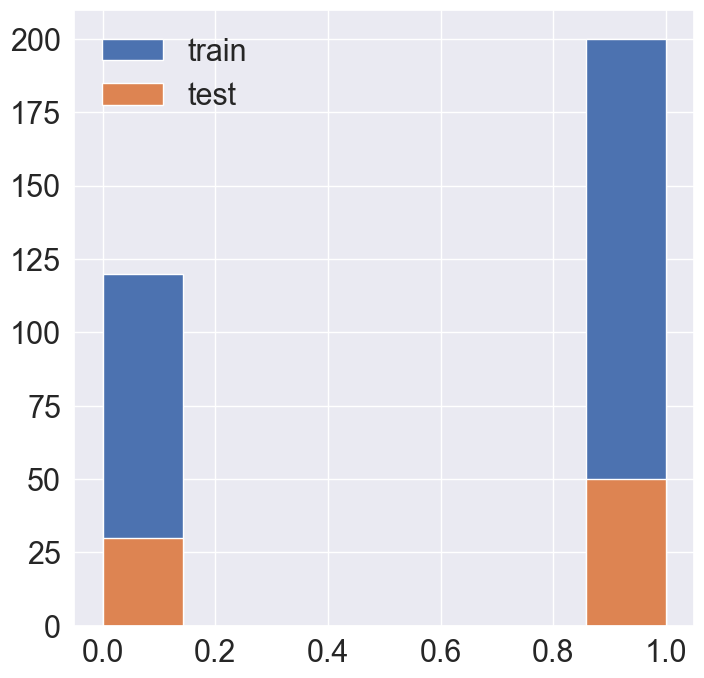

In [11]:
y_train.hist(bins=7, figsize=(8,8), label='train');
y_test.hist(bins=7, figsize=(8,8), label='test');
plt.legend();
sauvegarderImage("La separation des données pour l'apprentissage")